# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## ANKR 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_ankr_train_data = pd.read_csv('vader_textblob_ankr_train_data').drop('Unnamed: 0',axis=1)
flair_ankr_train_data = pd.read_csv('flair_ankr_train_data.csv').drop('Unnamed: 0',axis=1)
ankr_train_data = pd.read_csv('ankr_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_ankr_test_data = pd.read_csv('vader_textblob_ankr_test_data').drop('Unnamed: 0',axis=1)
flair_ankr_test_data = pd.read_csv('flair_ankr_test_data.csv').drop('Unnamed: 0',axis=1)
ankr_test_data = pd.read_csv('ankr_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(ankr_train_data,ankr_test_data)

In [6]:
coin =  gfmodel.coin_data_load('ankr')

  0%|          | 0/1170 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_ankr_train_data,flair_ankr_train_data)

(1193, 11)
(1193, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/1193 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-13,11241,2.0083,0.023908,5.229697,0.062258,9.275542,0.110423,17394,207.071429,...,0.07833,76872916.0,639378788.0,2022-04-14,0.07833,0.07977,0.07380,0.07609,49108077.0,621094807.0
1,2022-04-14,34533,27.1858,0.107880,19.602551,0.077788,-49.887953,-0.197968,51465,204.226190,...,0.07609,49108077.0,621094807.0,2022-04-15,0.07607,0.07703,0.07421,0.07586,24767465.0,619221766.0
2,2022-04-15,17177,6.4716,0.051362,3.952322,0.031368,-19.051141,-0.151200,23200,184.126984,...,0.07586,24767465.0,619221766.0,2022-04-16,0.07585,0.07687,0.07459,0.07609,16279110.0,621082954.0
3,2022-04-16,15152,3.8046,0.033970,3.245397,0.028977,-35.605735,-0.317908,25112,224.214286,...,0.07609,16279110.0,621082954.0,2022-04-17,0.07608,0.07716,0.07256,0.07262,21873974.0,592799112.0
4,2022-04-17,20075,18.7220,0.126500,11.442222,0.077312,-25.283605,-0.170835,43443,293.533784,...,0.07262,21873974.0,592799112.0,2022-04-18,0.07259,0.07476,0.06981,0.07471,46326217.0,609848770.0
5,2022-04-18,14359,9.3211,0.086306,8.782976,0.081324,-8.514151,-0.078835,33048,306.000000,...,0.07471,46326217.0,609848770.0,2022-04-19,0.07472,0.07688,0.07339,0.07687,31360394.0,627512810.0
6,2022-04-19,12562,5.2552,0.055318,6.458864,0.067988,-36.068300,-0.379666,31049,326.831579,...,0.07687,31360394.0,627512810.0,2022-04-20,0.07688,0.07820,0.07477,0.07661,43634148.0,625387607.0
7,2022-04-20,8118,18.1389,0.297359,8.648485,0.141778,-9.026636,-0.147978,44295,726.147541,...,0.07661,43634148.0,625387607.0,2022-04-21,0.07661,0.08567,0.07470,0.07554,117652724.0,616602415.0
8,2022-04-21,6005,2.7190,0.061795,1.877778,0.042677,-11.998101,-0.272684,10440,237.272727,...,0.07554,117652724.0,616602415.0,2022-04-22,0.07552,0.08201,0.07531,0.07665,96145420.0,625687164.0
9,2022-04-22,533,-0.2693,-0.053860,0.487500,0.097500,-2.429982,-0.485996,4394,878.800000,...,0.07665,96145420.0,625687164.0,2022-04-23,0.07663,0.07665,0.07465,0.07480,24351395.0,610560856.0


In [8]:
gfmodel.convert_test_data(vader_textblob_ankr_test_data,flair_ankr_test_data)

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/2451 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,1950,2.1754,0.087016,1.572727,0.062909,10.703759,0.428150,23034,921.360000,...,0.07008,34822644.0,572051555.0,2022-04-29,0.07009,0.07077,0.06482,0.06574,41982603.0,536599065.0
1,2022-04-29,7031,14.8713,0.275394,22.745455,0.421212,22.892796,0.423941,8760,162.222222,...,0.06574,41982603.0,536599065.0,2022-04-30,0.06573,0.06675,0.05840,0.05992,37630244.0,489148996.0
2,2022-04-30,19288,12.5790,0.085571,20.518182,0.139579,-22.619210,-0.153872,19451,132.319728,...,0.05992,37630244.0,489148996.0,2022-05-01,0.05996,0.06450,0.05932,0.06374,49493433.0,520284976.0
3,2022-05-01,20937,10.2150,0.064245,12.334091,0.077573,-0.386071,-0.002428,26721,168.056604,...,0.06374,49493433.0,520284976.0,2022-05-02,0.06374,0.06454,0.06068,0.06241,33565980.0,509410351.0
4,2022-05-02,22217,10.5620,0.058033,4.851667,0.026658,47.918356,0.263288,89535,491.950549,...,0.06241,33565980.0,509410351.0,2022-05-03,0.06240,0.06350,0.06008,0.06093,27102139.0,497384395.0
5,2022-05-03,5793,6.8446,0.136892,4.242222,0.084844,-3.734759,-0.074695,37430,748.600000,...,0.06093,27102139.0,497384395.0,2022-05-04,0.06093,0.06680,0.06093,0.06674,38286217.0,544793037.0
6,2022-05-04,2962,1.8908,0.072723,0.748810,0.028800,11.921431,0.458517,11710,450.384615,...,0.06674,38286217.0,544793037.0,2022-05-05,0.06674,0.06800,0.05914,0.06052,52108579.0,493978880.0
7,2022-05-05,11382,4.2657,0.044902,0.950000,0.010000,21.812820,0.229609,58364,614.357895,...,0.06052,52108579.0,493978880.0,2022-05-06,0.06052,0.06061,0.05648,0.05857,46880424.0,478114979.0
8,2022-05-06,59617,41.1841,0.092966,23.299683,0.052595,-47.888390,-0.108100,116976,264.054176,...,0.05857,46880424.0,478114979.0,2022-05-07,0.05856,0.05858,0.05468,0.05600,27797299.0,457111161.0
9,2022-05-07,59187,32.5427,0.074129,28.829048,0.065670,-125.937728,-0.286874,96102,218.911162,...,0.05600,27797299.0,457111161.0,2022-05-08,0.05600,0.05624,0.05378,0.05401,31761690.0,440893823.0


In [9]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-0.979360,-0.937475,-0.145479,-0.907162,-0.191631,0.379149,1.431242,-0.809085,2.134837,-0.573088,...,1.325924,-0.821826,1.325974,1.326574,1.290454,1.217395,1.154891,-0.244354,1.154685,2022-04-28
1,-0.678279,0.191723,2.644561,1.413010,3.560907,0.689290,1.414586,-1.242595,-1.156768,-0.912088,...,0.979021,-0.230746,0.978812,0.978358,0.944937,0.719786,0.674948,-0.606887,0.675313,2022-04-29
2,0.048025,-0.012158,-0.166874,1.168939,0.611344,-0.468728,-0.871560,-0.917903,-1.286425,-0.512970,...,0.513819,-0.590048,0.514166,0.517532,0.751551,0.791095,0.989962,0.381265,0.989869,2022-04-30
3,0.145739,-0.222417,-0.482732,0.272101,-0.038056,0.096977,-0.272364,-0.697109,-1.131471,1.941859,...,0.819157,0.389299,0.819059,0.819425,0.754989,0.896507,0.880284,-0.945423,0.880006,2022-05-01
4,0.221587,-0.191554,-0.574741,-0.547846,-0.571297,1.326046,0.778954,1.210590,0.272927,1.512681,...,0.712848,-0.925568,0.712572,0.712405,0.665602,0.850002,0.758237,-1.483833,0.758512,2022-05-02
5,-0.751638,-0.522187,0.593226,-0.614630,0.038100,0.011772,-0.558292,-0.371870,1.385753,-0.230748,...,0.594550,-1.459180,0.594810,0.595002,0.949235,0.915884,1.237356,-0.552247,1.237466,2022-05-03
6,-0.919393,-0.962788,-0.357169,-0.997449,-0.548855,0.410132,1.551387,-1.153002,0.092698,-0.858650,...,1.058952,-0.535896,1.059050,1.059023,1.052374,0.777143,0.724426,0.599096,0.724107,2022-05-04
7,-0.420455,-0.751560,-0.769220,-0.975402,-0.745753,0.661811,0.645701,0.263908,0.803682,-0.611497,...,0.561778,0.605188,0.561462,0.562257,0.417208,0.570969,0.563621,0.163613,0.563840,2022-05-05
8,2.437772,2.532036,-0.057349,1.473744,-0.299649,-1.111683,-0.690461,2.043989,-0.715227,0.049804,...,0.405911,0.173586,0.406118,0.405719,0.242731,0.431452,0.351687,-1.425929,0.351645,2022-05-06
9,2.412292,1.763453,-0.336344,2.079669,-0.162718,-3.097589,-1.397789,1.410033,-0.910966,-0.279177,...,0.200487,-1.401792,0.200442,0.201262,0.041610,0.361694,0.187582,-1.095712,0.187807,2022-05-07


In [10]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
gfmodel.make_model()

In [12]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.067187,0.06574,2022-04-28,34822644.0,0.07008,2022-04-29,-61.929224,-0.002893,True
1,0.062299,0.05992,2022-04-29,41982603.0,0.06574,2022-04-30,-88.530575,-0.003441,True
2,0.057494,0.06374,2022-04-30,37630244.0,0.05992,2022-05-01,63.751669,-0.002426,False
3,0.061193,0.06241,2022-05-01,49493433.0,0.06374,2022-05-02,-20.866018,-0.002547,True
4,0.060228,0.06093,2022-05-02,33565980.0,0.06241,2022-05-03,-23.714148,-0.002182,True
5,0.058219,0.06674,2022-05-03,27102139.0,0.06093,2022-05-04,95.355326,-0.002711,False
6,0.064247,0.06052,2022-05-04,38286217.0,0.06674,2022-05-05,-93.197483,-0.002493,True
7,0.058549,0.05857,2022-05-05,52108579.0,0.06052,2022-05-06,-32.220753,-0.001971,True
8,0.056266,0.05600,2022-05-06,46880424.0,0.05857,2022-05-07,-43.879119,-0.002304,True
9,0.053881,0.05401,2022-05-07,27797299.0,0.05600,2022-05-08,-35.535714,-0.002119,True


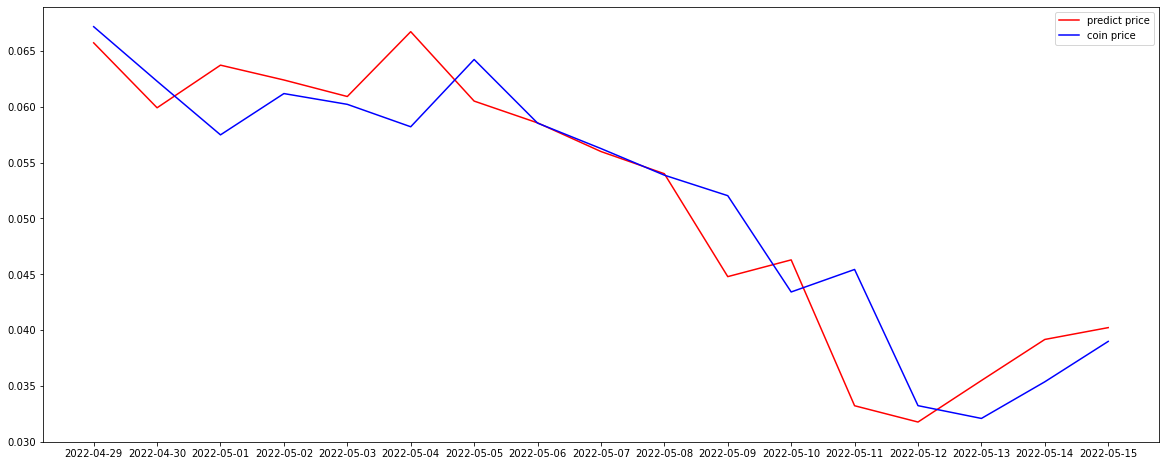

In [13]:
gfmodel.visualize()

In [14]:
result.to_csv('ANKR_result_data')

In [15]:
gfmodel.save_csv('ANKR_Visulize_data.csv')